In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('AddedFeatures_campaign_sale.csv')
dataset.head(20)

,Index,Campaign Period Sales,Buy,Historical Sales Volume,Number of Prior Year Transactions,Number of Transactions,Purchase Breadth,Customer_engagement_days,Days_since_last_transaction,Customer_engagement_length,...,Email Available,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies
0,0,238.704762,1,1.468034e+05,15,15,2,19170,2242,Long-term,...,True,False,False,False,False,False,False,True,False,True
1,1,281.680000,1,4.399842e+05,22,22,1,14530,2368,Long-term,...,True,False,False,False,False,False,False,False,False,True
2,2,432.857143,1,9.704657e+05,19,19,1,21331,4028,Long-term,...,True,False,False,False,False,False,False,False,False,True
3,3,0.000000,0,2.301936e+05,17,17,1,13814,2417,Mid-term,...,True,False,False,False,False,False,False,False,False,True
4,4,308.419048,1,1.825841e+05,16,16,2,15292,3137,Long-term,...,False,False,False,False,False,False,False,False,True,True
5,5,0.000000,0,1.512525e+05,6,6,0,12551,2893,Mid-term,...,True,False,False,False,False,False,False,False,False,False
6,6,0.000000,0,1.377761e+06,21,21,1,12991,2779,Mid-term,...,False,False,False,False,False,False,False,False,False,True
7,7,223.440000,1,2.775125e+05,18,18,1,14149,3214,Mid-term,...,False,False,False,False,False,False,False,False,False,True
8,8,0.000000,0,2.214571e+05,15,15,1,13631,2077,Mid-term,...,True,False,False,False,False,False,False,False,False,True
9,9,124.760000,1,1.993665e+05,17,17,1,14817,2204,Long-term,...,True,False,False,False,False,False,False,False,False,True


In [4]:
'''finding the indices'''
dataset.index

RangeIndex(start=0, stop=12132, step=1)

so we have 12133 number of entries or indices.
let's work on customer_engagement_days to find average cutomer engagement days

In [5]:
dataset['Customer_engagement_days'].unique()

array([19170, 14530, 21331, ...,  3551, 16241,  1787], dtype=int64)

to list the columns of the dataset

In [6]:
cols = dataset.columns.tolist()
cols

['Index',
 'Campaign Period Sales',
 'Buy',
 'Historical Sales Volume',
 'Number of Prior Year Transactions',
 'Number of Transactions',
 'Purchase Breadth',
 'Customer_engagement_days',
 'Days_since_last_transaction',
 'Customer_engagement_length',
 'Language_group',
 'Repurchase Method',
 'Last Transaction Channel',
 'Number of Employees',
 'Service Level',
 'Do No Disturb',
 'Email Available',
 'Desk',
 'Executive Chair',
 'Standard Chair',
 'Monitor',
 'Printer',
 'Computer',
 'Insurance',
 'Toner',
 'Office Supplies']

statistical description of the dataset

In [7]:
dataset.describe(include="all")

,Index,Campaign Period Sales,Buy,Historical Sales Volume,Number of Prior Year Transactions,Number of Transactions,Purchase Breadth,Customer_engagement_days,Days_since_last_transaction,Customer_engagement_length,...,Email Available,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies
count,12132.000000,12132.000000,12132.000000,1.213200e+04,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132,...,12132,12132,12132,12132,12132,12132,12132,12132,12132,12132
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mid-term,...,True,False,False,False,False,False,False,False,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8577,...,8829,11500,11280,12027,12023,11912,12065,10848,11429,11258
mean,6065.500000,107.933384,0.270936,5.600768e+05,16.512117,16.500412,1.255358,10297.605589,3009.300363,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3502.351067,267.200455,0.444462,7.039575e+05,6.034094,6.040510,0.751494,3969.253480,794.941745,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,1033.000000,934.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3032.750000,0.000000,0.000000,1.792572e+05,13.000000,13.000000,1.000000,8670.000000,2431.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6065.500000,0.000000,0.000000,3.678030e+05,18.000000,18.000000,1.000000,10055.000000,2925.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9098.250000,137.278000,1.000000,6.921952e+05,20.000000,20.000000,1.000000,12323.000000,3436.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mean, standard deviation, minimum,Q1,Q2,Q3 maximum of different columns can be seen calculated in the table above

In [8]:
dataset_email_available = dataset['Email Available']
dataset_email_available

0         True
1         True
2         True
3         True
4        False
         ...  
12127     True
12128    False
12129     True
12130     True
12131     True
Name: Email Available, Length: 12132, dtype: bool

email data cleaning for storing the information

In [9]:
dataset.groupby("Email Available").count()

,Index,Campaign Period Sales,Buy,Historical Sales Volume,Number of Prior Year Transactions,Number of Transactions,Purchase Breadth,Customer_engagement_days,Days_since_last_transaction,Customer_engagement_length,...,Do No Disturb,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies
Email Available,,,,,,,,,,,,,,,,,,,,,
False,3303,3303,3303,3303,3303,3303,3303,3303,3303,3303,...,3303,3303,3303,3303,3303,3303,3303,3303,3303,3303
True,8829,8829,8829,8829,8829,8829,8829,8829,8829,8829,...,8829,8829,8829,8829,8829,8829,8829,8829,8829,8829


In [10]:
email_available = dataset[dataset['Email Available'] == True]
email_available

,Index,Campaign Period Sales,Buy,Historical Sales Volume,Number of Prior Year Transactions,Number of Transactions,Purchase Breadth,Customer_engagement_days,Days_since_last_transaction,Customer_engagement_length,...,Email Available,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies
0,0,238.704762,1,146803.428571,15,15,2,19170,2242,Long-term,...,True,False,False,False,False,False,False,True,False,True
1,1,281.680000,1,439984.160000,22,22,1,14530,2368,Long-term,...,True,False,False,False,False,False,False,False,False,True
2,2,432.857143,1,970465.714286,19,19,1,21331,4028,Long-term,...,True,False,False,False,False,False,False,False,False,True
3,3,0.000000,0,230193.600000,17,17,1,13814,2417,Mid-term,...,True,False,False,False,False,False,False,False,False,True
5,5,0.000000,0,151252.500000,6,6,0,12551,2893,Mid-term,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12126,12126,0.000000,0,937681.920000,24,24,1,5465,3558,Short-term,...,True,False,False,False,False,False,False,False,False,True
12127,12127,0.000000,0,32328.400000,6,6,1,8778,2624,Mid-term,...,True,False,False,False,False,False,False,False,False,True
12129,12129,0.000000,0,71762.880000,21,21,2,8608,2384,Mid-term,...,True,False,False,False,False,False,False,True,False,True
12130,12130,0.000000,0,265963.062857,18,18,1,10725,2107,Mid-term,...,True,False,False,False,False,False,False,False,False,True


In [11]:
data_with_selected_columns = email_available[['Email Available']]
data_with_selected_columns

,Email Available
0,True
1,True
2,True
3,True
5,True
...,...
12126,True
12127,True
12129,True
12130,True


These are the list of email available in the dataset

In [12]:
dataset.isnull().sum()

Index                                0
Campaign Period Sales                0
Buy                                  0
Historical Sales Volume              0
Number of Prior Year Transactions    0
Number of Transactions               0
Purchase Breadth                     0
Customer_engagement_days             0
Days_since_last_transaction          0
Customer_engagement_length           0
Language_group                       0
Repurchase Method                    0
Last Transaction Channel             0
Number of Employees                  0
Service Level                        0
Do No Disturb                        0
Email Available                      0
Desk                                 0
Executive Chair                      0
Standard Chair                       0
Monitor                              0
Printer                              0
Computer                             0
Insurance                            0
Toner                                0
Office Supplies          

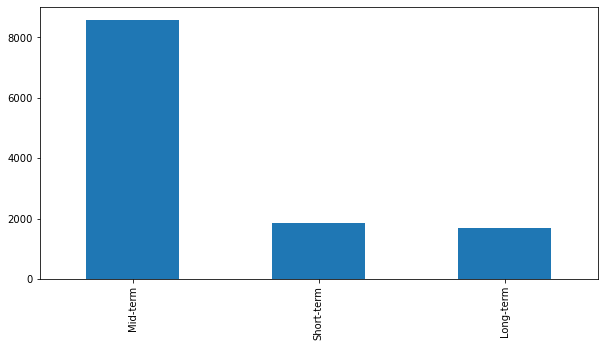

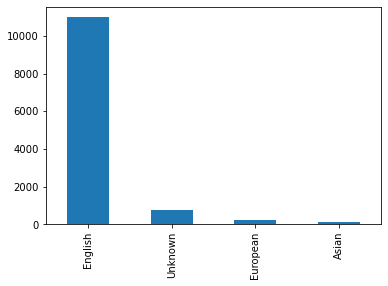

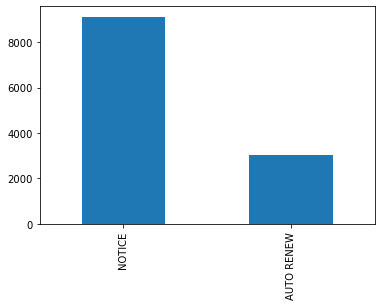

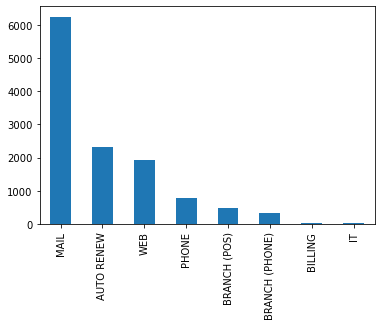

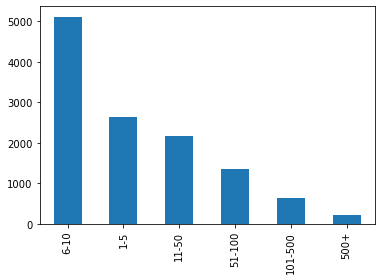

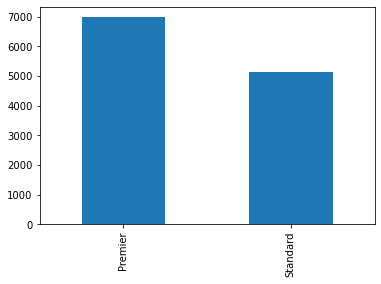

In [13]:
plt.figure(figsize = (10,5))
for category in dataset.select_dtypes(include = ["O"]):
    dataset[category].value_counts().plot(kind = "bar")
    plt.show()

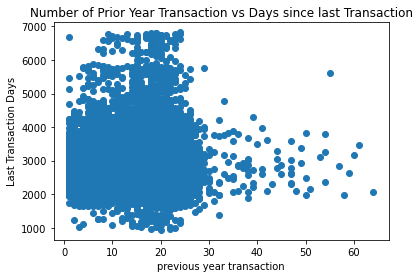

In [16]:
plt.title("Number of Prior Year Transaction vs Days since last Transaction")
plt.xlabel("previous year transaction")
plt.ylabel("Last Transaction Days")

plt.scatter(dataset['Number of Prior Year Transactions'],dataset['Days_since_last_transaction'])


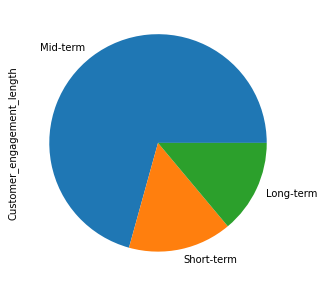

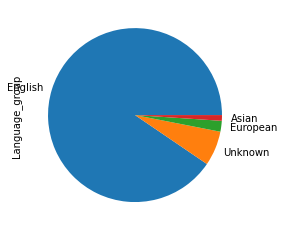

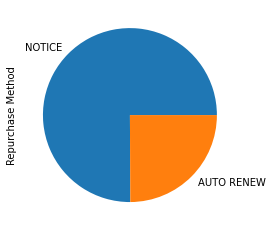

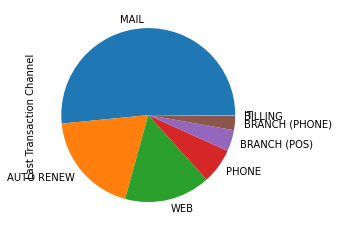

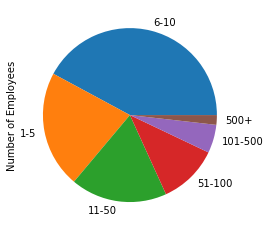

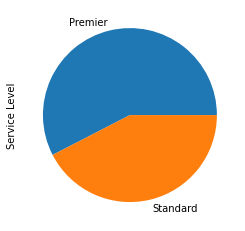

In [25]:
plt.figure(figsize = (5,5))
for value in dataset.select_dtypes(include = ["O"] ):
    dataset[value].value_counts().plot(kind='pie')
    plt.show()
